<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/Regression-sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learnを利用した線形回帰


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

np.random.seed(9876789)

収率データの読み込みとプロット

data= [[ 2.2 71. ]
 [ 4.1 81. ]
 [ 5.5 86. ]
 [ 1.9 72. ]
 [ 3.4 77. ]
 [ 2.6 73. ]
 [ 2.6 73. ]
 [ 4.2 80. ]
 [ 3.7 81. ]
 [ 4.9 85. ]
 [ 3.2 74. ]]
x= [2.2 4.1 5.5 1.9 3.4 2.6 2.6 4.2 3.7 4.9 3.2]
y= [71. 81. 86. 72. 77. 73. 73. 80. 81. 85. 74.]


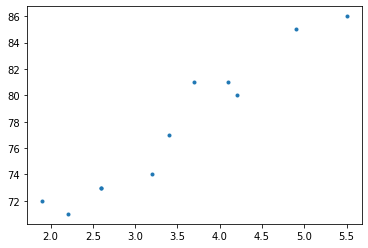

In [15]:
data = np.loadtxt("https://raw.githubusercontent.com/namoshi/ml_intro/master/syuritu.dat", comments="#")

print('data=', data)

x = data[:,0]

y = data[:,1]

print('x=', x)
print('y=', y)

plt.plot(x,y,'.')
plt.show()

単回帰分析

In [16]:
X = []
for i in range(len(x)):
    X.append([x[i]])
X = np.array(X)
print('X\n',X)
print('y\n',y)

# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X, y)

# predictions
y_pred = regr.predict(X)
print('predicted y\n', y_pred)
print('predicted errors\n', y - y_pred)


print('\n===== Model ====')
# Coeff
print('coef=',regr.coef_, 'intercept=', regr.intercept_)

# R^2
print('R^2=', regr.score(X, y))

X
 [[2.2]
 [4.1]
 [5.5]
 [1.9]
 [3.4]
 [2.6]
 [2.6]
 [4.2]
 [3.7]
 [4.9]
 [3.2]]
y
 [71. 81. 86. 72. 77. 73. 73. 80. 81. 85. 74.]
predicted y
 [71.69371542 80.36756987 86.75883104 70.32415946 77.17193928 73.51979004
 73.51979004 80.82408852 78.54149525 84.01971911 76.25890197]
predicted errors
 [-0.69371542  0.63243013 -0.75883104  1.67584054 -0.17193928 -0.51979004
 -0.51979004 -0.82408852  2.45850475  0.98028089 -2.25890197]

===== Model ====
coef= [4.56518655] intercept= 61.65030500780252
R^2= 0.9381079388270429


回帰直線の表示

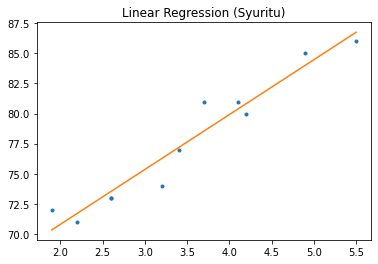

In [17]:
plt.plot(x,y,'.')
max_x = np.max(x)
min_x = np.min(x)

# model
#beta = regr.coef_
#print('Coeffs=', beta)
xx = np.linspace(min_x, max_x, 100)
XX = []
for i in range(len(xx)):
    XX.append([xx[i]])
XX = np.array(XX)
yy = regr.predict(XX)
plt.plot(xx, yy)
plt.title('Linear Regression (Syuritu)')
plt.savefig("linreg_syuritu.eps")
plt.show()

## 重回帰分析

マンションの広さと築年数から価格（千万円）を推定するためのモデルを重回帰分析を用いて構築

マンションデータの読み込み

In [5]:
data = np.loadtxt("https://raw.githubusercontent.com/namoshi/ml_intro/master/condo.dat", comments="#")

print('data=', data)

x = data[:,:2]

y = data[:,2]

print('x\n', x)
print('y\n', y)

data= [[51.  16.   3. ]
 [38.   4.   3.2]
 [57.  16.   3.3]
 [51.  11.   3.9]
 [53.   4.   4.4]
 [77.  22.   4.5]
 [63.   5.   4.5]
 [69.   5.   5.4]
 [72.   2.   5.4]
 [73.   1.   6. ]]
x
 [[51. 16.]
 [38.  4.]
 [57. 16.]
 [51. 11.]
 [53.  4.]
 [77. 22.]
 [63.  5.]
 [69.  5.]
 [72.  2.]
 [73.  1.]]
y
 [3.  3.2 3.3 3.9 4.4 4.5 4.5 5.4 5.4 6. ]


重回帰分析

In [6]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

print('y\n', y)
# predictions
y_pred = regr.predict(x)
print('predicted price\n', y_pred)
print('prediction errors\n', y - y_pred)

print('\n===== Model ====')
#
# Coeff
print('coef=',regr.coef_)
print('intercept=', regr.intercept_)

# R^2
print('R^2=', regr.score(x, y))

y
 [3.  3.2 3.3 3.9 4.4 4.5 4.5 5.4 5.4 6. ]
predicted price
 [3.13389369 3.23539093 3.53472229 3.53804336 4.23746242 4.38583801
 4.82468015 5.22550875 5.66841285 5.81604755]
prediction errors
 [-0.13389369 -0.03539093 -0.23472229  0.36195664  0.16253758  0.11416199
 -0.32468015  0.17449125 -0.26841285  0.18395245]

===== Model ====
coef= [ 0.06680477 -0.08082993]
intercept= 1.0201295472033305
R^2= 0.9483778666529434


## ボール投げのデータの重回帰分析

握力，体重，身長からボール投げの記録を推定するモデルを重回帰分析を用いて構築


データの読み込み

In [7]:
data = np.loadtxt("https://raw.githubusercontent.com/namoshi/ml_intro/master/ball.dat", comments="#")

print('data\n', data)

x = data[:,1:]

y = data[:,0]

print('x\n', x)
print('y\n', y)

data
 [[ 22.  28. 146.  34.]
 [ 36.  46. 169.  57.]
 [ 24.  39. 160.  48.]
 [ 22.  25. 156.  38.]
 [ 27.  34. 161.  47.]
 [ 29.  29. 168.  50.]
 [ 26.  38. 154.  54.]
 [ 23.  23. 153.  40.]
 [ 31.  42. 160.  62.]
 [ 24.  27. 152.  39.]
 [ 23.  35. 155.  46.]
 [ 27.  39. 154.  54.]
 [ 31.  38. 157.  57.]
 [ 25.  32. 162.  53.]
 [ 23.  25. 142.  32.]]
x
 [[ 28. 146.  34.]
 [ 46. 169.  57.]
 [ 39. 160.  48.]
 [ 25. 156.  38.]
 [ 34. 161.  47.]
 [ 29. 168.  50.]
 [ 38. 154.  54.]
 [ 23. 153.  40.]
 [ 42. 160.  62.]
 [ 27. 152.  39.]
 [ 35. 155.  46.]
 [ 39. 154.  54.]
 [ 38. 157.  57.]
 [ 32. 162.  53.]
 [ 25. 142.  32.]]
y
 [22. 36. 24. 22. 27. 29. 26. 23. 31. 24. 23. 27. 31. 25. 23.]


重回帰分析

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

print('y\n', y)
# predictions
y_pred = regr.predict(x)
print('predicted y\n', y_pred)
print('errors\n', y - y_pred)

print('\n===== Model ====')
#
# Coeff
print('coef=',regr.coef_)
print('intercept=', regr.intercept_)

# R^2
print('R^2=', regr.score(x, y))

y
 [22. 36. 24. 22. 27. 29. 26. 23. 31. 24. 23. 27. 31. 25. 23.]
predicted y
 [21.63889629 32.07092924 27.9975849  23.24478244 27.03678226 27.60189815
 27.51971724 22.5788405  30.35091442 23.0883807  26.08706895 27.72109413
 28.40761928 27.55470971 20.10078179]
errors
 [ 0.36110371  3.92907076 -3.9975849  -1.24478244 -0.03678226  1.39810185
 -1.51971724  0.4211595   0.64908558  0.9116193  -3.08706895 -0.72109413
  2.59238072 -2.55470971  2.89921821]

===== Model ====
coef= [0.20137689 0.17102457 0.12494278]
intercept= -13.217298316378471
R^2= 0.6913489585945566


## 多項式回帰

サイン関数にノイズを付加したデータに対する多項式回帰の当てはめ

サイン関数にノイズを付加したデータの生成

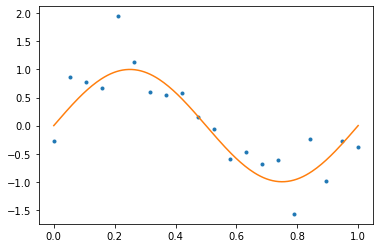

In [9]:
%matplotlib inline
import math
nsample = 20
err = np.random.normal(size=nsample)/3.0
x = np.linspace(0.0, 1.0, nsample)
y = np.sin(2*math.pi*x) + err

# plot samples
plt.plot(x,y,'.')

# plot graph of sin(x)
xx = np.linspace(0.0, 1.0, 200)
plt.plot(xx,np.sin(2*math.pi*xx))
plt.show()


多項式回帰（３次）

In [10]:
X = np.column_stack((x, x**2, x**3))
print('X', X)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# predictions
y_pred = regr.predict(X)
print(y_pred)

#
# Coeff
print('coef=',regr.coef_)
print('intercept=', regr.intercept_)

X [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.26315789e-02 2.77008310e-03 1.45793847e-04]
 [1.05263158e-01 1.10803324e-02 1.16635078e-03]
 [1.57894737e-01 2.49307479e-02 3.93643388e-03]
 [2.10526316e-01 4.43213296e-02 9.33080624e-03]
 [2.63157895e-01 6.92520776e-02 1.82242309e-02]
 [3.15789474e-01 9.97229917e-02 3.14914711e-02]
 [3.68421053e-01 1.35734072e-01 5.00072897e-02]
 [4.21052632e-01 1.77285319e-01 7.46464499e-02]
 [4.73684211e-01 2.24376731e-01 1.06283715e-01]
 [5.26315789e-01 2.77008310e-01 1.45793847e-01]
 [5.78947368e-01 3.35180055e-01 1.94051611e-01]
 [6.31578947e-01 3.98891967e-01 2.51931768e-01]
 [6.84210526e-01 4.68144044e-01 3.20309083e-01]
 [7.36842105e-01 5.42936288e-01 4.00058318e-01]
 [7.89473684e-01 6.23268698e-01 4.92054235e-01]
 [8.42105263e-01 7.09141274e-01 5.97171599e-01]
 [8.94736842e-01 8.00554017e-01 7.16285173e-01]
 [9.47368421e-01 8.97506925e-01 8.50269719e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[ 0.02805186  0.51248019  0.83934959 

結果の表示

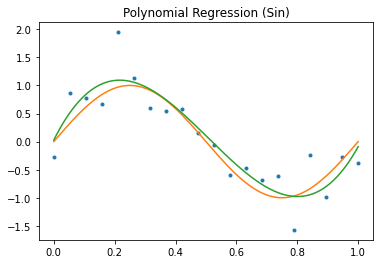

In [11]:
# plot samples
plt.plot(x,y,'.')

# plot graph of sin(x)
xx = np.linspace(0.0, 1.0, 200)
plt.plot(xx,np.sin(2*math.pi*xx))

XX = np.column_stack((xx, xx**2, xx**3))
yy = regr.predict(XX)
plt.plot(xx, yy)
plt.title('Polynomial Regression (Sin)')
plt.savefig("polyreg_sin_qubic.eps")
plt.show()
